# Stochastic Gradient Descent, Rétropropagation et Réseaux de Neurones Feedforward

Ce notebook explore les concepts fondamentaux des réseaux de neurones feedforward, l'algorithme de rétropropagation du gradient, et l'optimisation par descente de gradient stochastique (SGD).

## Sommaire
1. Introduction aux réseaux de neurones feedforward
2. Propagation avant (Forward Propagation)
3. Rétropropagation du gradient (Backpropagation)
4. Descente de gradient stochastique (SGD)
5. Implémentation d'un réseau de neurones simple

## 1. Introduction aux réseaux de neurones feedforward

Les réseaux de neurones feedforward sont les architectures les plus simples de réseaux de neurones artificiels. L'information se propage uniquement dans un sens : de l'entrée vers la sortie, sans boucles de rétroaction.

Un réseau de neurones feedforward est généralement organisé en couches :
- Une couche d'entrée
- Une ou plusieurs couches cachées
- Une couche de sortie

Chaque couche est composée de neurones (ou unités) qui reçoivent des entrées, effectuent une transformation non-linéaire, et transmettent le résultat à la couche suivante.

In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import time

# Configuration pour la reproductibilité
np.random.seed(0)

## 2. Propagation avant (Forward Propagation)

La propagation avant est le processus par lequel l'information circule de l'entrée vers la sortie du réseau. Pour chaque neurone, nous calculons la somme pondérée des entrées, puis appliquons une fonction d'activation.

Mathématiquement, pour une couche $l$ avec $n^{[l]}$ neurones, la propagation avant est définie par :

$$Z^{[l]} = W^{[l]} \cdot A^{[l-1]} + b^{[l]}$$
$$A^{[l]} = g^{[l]}(Z^{[l]})$$

où :
- $Z^{[l]}$ est l'entrée linéaire de la couche $l$
- $W^{[l]}$ est la matrice des poids de la couche $l$
- $A^{[l-1]}$ est l'activation de la couche précédente
- $b^{[l]}$ est le vecteur de biais de la couche $l$
- $g^{[l]}$ est la fonction d'activation de la couche $l$
- $A^{[l]}$ est l'activation de la couche $l$

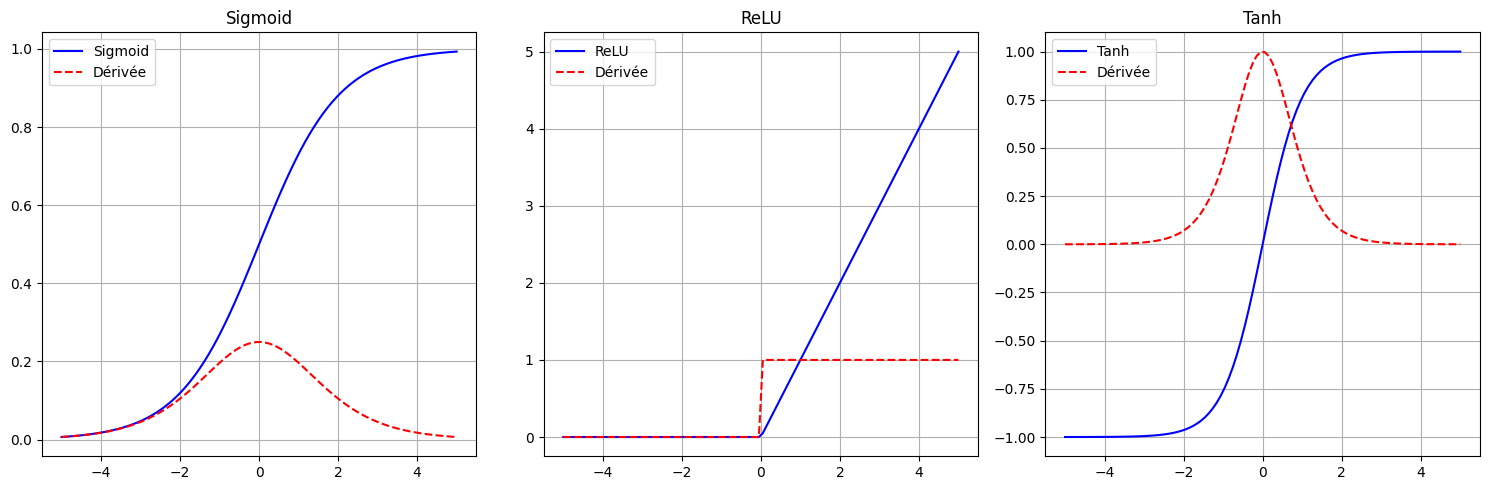

In [2]:
# Implémentation des fonctions d'activation courantes
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.power(np.tanh(z), 2)

# Visualisation des fonctions d'activation
z = np.linspace(-5, 5, 100)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(z, sigmoid(z), 'b', label='Sigmoid')
plt.plot(z, sigmoid_derivative(z), 'r--', label='Dérivée')
plt.legend()
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(z, relu(z), 'b', label='ReLU')
plt.plot(z, relu_derivative(z), 'r--', label='Dérivée')
plt.legend()
plt.title('ReLU')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(z, tanh(z), 'b', label='Tanh')
plt.plot(z, tanh_derivative(z), 'r--', label='Dérivée')
plt.legend()
plt.title('Tanh')
plt.grid(True)

plt.tight_layout()
plt.show()

## 3. Rétropropagation du gradient (Backpropagation)

La rétropropagation est l'algorithme utilisé pour calculer les gradients de la fonction de perte par rapport aux paramètres du réseau (poids et biais). Ces gradients sont ensuite utilisés pour mettre à jour les paramètres lors de l'optimisation.

Le principe de la rétropropagation est basé sur la règle de dérivation en chaîne. Pour une couche $l$, nous calculons :

$$\frac{\partial \mathcal{L}}{\partial Z^{[l]}} = \frac{\partial \mathcal{L}}{\partial A^{[l]}} \cdot \frac{\partial A^{[l]}}{\partial Z^{[l]}}$$

$$\frac{\partial \mathcal{L}}{\partial W^{[l]}} = \frac{\partial \mathcal{L}}{\partial Z^{[l]}} \cdot \frac{\partial Z^{[l]}}{\partial W^{[l]}} = \frac{\partial \mathcal{L}}{\partial Z^{[l]}} \cdot A^{[l-1]T}$$

$$\frac{\partial \mathcal{L}}{\partial b^{[l]}} = \frac{\partial \mathcal{L}}{\partial Z^{[l]}} \cdot \frac{\partial Z^{[l]}}{\partial b^{[l]}} = \frac{\partial \mathcal{L}}{\partial Z^{[l]}}$$

$$\frac{\partial \mathcal{L}}{\partial A^{[l-1]}} = W^{[l]T} \cdot \frac{\partial \mathcal{L}}{\partial Z^{[l]}}$$

où $\mathcal{L}$ est la fonction de perte.

## 4. Descente de gradient stochastique (SGD)

La descente de gradient stochastique est un algorithme d'optimisation utilisé pour minimiser la fonction de perte en ajustant les paramètres du réseau dans la direction opposée au gradient.

L'équation de mise à jour des paramètres est :

$$\theta = \theta - \alpha \cdot \nabla_\theta \mathcal{L}(\theta)$$

où :
- $\theta$ représente un paramètre du réseau (poids ou biais)
- $\alpha$ est le taux d'apprentissage
- $\nabla_\theta \mathcal{L}(\theta)$ est le gradient de la fonction de perte par rapport au paramètre $\theta$

La spécificité de la descente de gradient stochastique est qu'elle utilise un sous-ensemble aléatoire de données (mini-batch) à chaque itération, ce qui rend l'optimisation plus efficace et permet d'échapper à certains minima locaux.

## 5. Implémentation d'un réseau de neurones simple

Nous allons maintenant implémenter un réseau de neurones feedforward simple avec NumPy.

In [3]:
# Génération d'un jeu de données synthétique
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversion des classes pour correspondre à notre fonction d'activation de sortie (sigmoid)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [4]:
class NeuralNetwork:
    def __init__(self, layer_dims, activations):
        """
        Initialise un réseau de neurones feedforward.
        
        Arguments:
        layer_dims -- liste contenant les dimensions de chaque couche
        activations -- liste contenant les fonctions d'activation de chaque couche
        """
        self.L = len(layer_dims) - 1  # nombre de couches
        self.layer_dims = layer_dims
        self.activations = activations
        self.parameters = {}
        self.cache = {}
        self.gradients = {}
        
        # Initialisation des poids et biais
        for l in range(1, self.L + 1):
            # He initialization pour ReLU, Xavier pour sigmoid/tanh
            if activations[l-1] == relu:
                self.parameters[f"W{l}"] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
            else:
                self.parameters[f"W{l}"] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(1 / layer_dims[l-1])
                
            self.parameters[f"b{l}"] = np.zeros((layer_dims[l], 1))
    
    def forward_propagation(self, X):
        """
        Effectue la propagation avant à travers le réseau.
        
        Arguments:
        X -- données d'entrée, de forme (nb_examples, nb_features)
        
        Returns:
        AL -- activation de la dernière couche
        """
        A = X.T  # Transposée pour avoir la forme (nb_features, nb_examples)
        self.cache["A0"] = A
        
        for l in range(1, self.L + 1):
            Z = np.dot(self.parameters[f"W{l}"], A) + self.parameters[f"b{l}"]
            self.cache[f"Z{l}"] = Z
            
            A = self.activations[l-1](Z)
            self.cache[f"A{l}"] = A
        
        return A
    
    def compute_cost(self, AL, Y):
        """
        Calcule la fonction de coût (entropie croisée binaire).
        
        Arguments:
        AL -- activation de la dernière couche, de forme (1, nb_examples)
        Y -- vecteur des étiquettes, de forme (1, nb_examples)
        
        Returns:
        cost -- coût
        """
        m = Y.shape[1]
        
        # Entropie croisée binaire
        cost = -1/m * np.sum(Y * np.log(AL + 1e-8) + (1 - Y) * np.log(1 - AL + 1e-8))
        
        return np.squeeze(cost)
    
    def backward_propagation(self, Y):
        """
        Effectue la rétropropagation pour calculer les gradients.
        
        Arguments:
        Y -- vecteur des étiquettes, de forme (1, nb_examples)
        """
        m = Y.shape[1]
        Y = Y.T  # Transposée pour avoir la forme (1, nb_examples)
        
        # Initialisation de dA pour la dernière couche (dérivée de l'entropie croisée binaire)
        dA = - (np.divide(Y, self.cache[f"A{self.L}"] + 1e-8) - np.divide(1 - Y, 1 - self.cache[f"A{self.L}"] + 1e-8))
        
        for l in reversed(range(1, self.L + 1)):
            Z = self.cache[f"Z{l}"]
            
            # Dérivée de la fonction d'activation
            if self.activations[l-1] == sigmoid:
                dZ = dA * sigmoid_derivative(Z)
            elif self.activations[l-1] == relu:
                dZ = dA * relu_derivative(Z)
            elif self.activations[l-1] == tanh:
                dZ = dA * tanh_derivative(Z)
            
            A_prev = self.cache[f"A{l-1}"]
            
            # Calcul des gradients
            self.gradients[f"dW{l}"] = 1/m * np.dot(dZ, A_prev.T)
            self.gradients[f"db{l}"] = 1/m * np.sum(dZ, axis=1, keepdims=True)
            
            if l > 1:
                dA = np.dot(self.parameters[f"W{l}"].T, dZ)
    
    def update_parameters(self, learning_rate):
        """
        Met à jour les paramètres en utilisant la descente de gradient.
        
        Arguments:
        learning_rate -- taux d'apprentissage
        """
        for l in range(1, self.L + 1):
            self.parameters[f"W{l}"] -= learning_rate * self.gradients[f"dW{l}"]
            self.parameters[f"b{l}"] -= learning_rate * self.gradients[f"db{l}"]
    
    def train(self, X, Y, num_iterations, learning_rate, batch_size=32, print_cost=False):
        """
        Entraîne le réseau de neurones en utilisant la descente de gradient stochastique.
        
        Arguments:
        X -- données d'entrée, de forme (nb_examples, nb_features)
        Y -- vecteur des étiquettes, de forme (nb_examples, 1)
        num_iterations -- nombre d'itérations
        learning_rate -- taux d'apprentissage
        batch_size -- taille des mini-batchs
        print_cost -- si True, affiche le coût toutes les 100 itérations
        """
        costs = []
        
        # Conversion des données pour assurer la bonne forme
        Y = Y.reshape(-1, 1)
        
        for i in range(num_iterations):
            # Choix aléatoire d'un mini-batch
            indices = np.random.permutation(X.shape[0])
            for k in range(0, X.shape[0], batch_size):
                batch_indices = indices[k:k+batch_size]
                X_batch = X[batch_indices]
                Y_batch = Y[batch_indices]
                
                # Propagation avant
                AL = self.forward_propagation(X_batch)
                
                # Calcul du coût
                cost = self.compute_cost(AL, Y_batch.T)
                
                # Rétropropagation
                self.backward_propagation(Y_batch.T)
                
                # Mise à jour des paramètres
                self.update_parameters(learning_rate)
            
            # Affichage du coût
            if print_cost and i % 100 == 0:
                print(f"Coût après itération {i}: {cost}")
                costs.append(cost)
        
        return costs
    
    def predict(self, X):
        """
        Prédit les classes pour les données X.
        
        Arguments:
        X -- données d'entrée, de forme (nb_examples, nb_features)
        
        Returns:
        predictions -- vecteur des prédictions, de forme (nb_examples, 1)
        """
        AL = self.forward_propagation(X)
        predictions = (AL > 0.5).astype(int)
        
        return predictions.T  # Transposée pour avoir la forme (nb_examples, 1)
    
    def evaluate(self, X, Y):
        """
        Évalue la précision du modèle sur les données X avec les étiquettes Y.
        
        Arguments:
        X -- données d'entrée, de forme (nb_examples, nb_features)
        Y -- vecteur des étiquettes, de forme (nb_examples, 1)
        
        Returns:
        accuracy -- précision du modèle
        """
        predictions = self.predict(X)
        accuracy = np.mean(predictions == Y)
        
        return accuracy

In [10]:
nn_test = NeuralNetwork([28, 10, 3], [relu, sigmoid])

In [ ]:
nn_test.

In [31]:
input_x = np.random.randn(28)[None,:]
input_x

array([[-1.44657789, -1.58268564,  0.96055722,  0.22584048, -0.54949855,
        -1.09857073,  2.32079984,  0.11709087,  0.53420117,  0.3178851 ,
         0.43480796,  0.54009446,  0.73242401, -0.3752224 , -0.29164199,
        -1.74102281, -0.78030441,  0.2711128 ,  1.04502338,  0.59903953,
        -0.34069234, -1.26317291, -2.77735915,  1.15173397, -0.58922899,
        -0.44846501,  0.13157397, -1.40556005]])

In [36]:
input_x = np.random.randn(28)[:,None]

A_1 = nn_test.activations[0](np.dot(nn_test.parameters["W1"], input_x) + nn_test.parameters["b1"])
A_2 = nn_test.activations[1](np.dot(nn_test.parameters["W2"], A_1) + nn_test.parameters["b2"])


ValueError: shapes (10,28) and (1,28) not aligned: 28 (dim 1) != 1 (dim 0)

In [35]:
A_1

array([[0.1226362 ],
       [1.83151955],
       [0.95994922],
       [0.48870347],
       [0.        ],
       [0.        ],
       [0.2389412 ],
       [1.56189861],
       [0.        ],
       [0.        ]])

In [25]:
nn_test.activations[0]

<function __main__.relu(z)>

In [26]:
nn_test.activations[1]

<function __main__.sigmoid(z)>

In [ ]:
# Définition de l'architecture du réseau
layer_dims = [X_train.shape[1], 64, 32, 1]  # [entrée, couche cachée 1, couche cachée 2, sortie]
activations = [relu, relu, sigmoid]  # Fonctions d'activation pour chaque couche

# Création et entraînement du réseau avec NumPy
nn = NeuralNetwork(layer_dims, activations)

start_time = time.time()
costs = nn.train(X_train, y_train, num_iterations=500, learning_rate=0.01, batch_size=32, print_cost=True)
numpy_time = time.time() - start_time

# Évaluation du modèle
train_accuracy = nn.evaluate(X_train, y_train)
test_accuracy = nn.evaluate(X_test, y_test)

print(f"\nPrécision sur l'ensemble d'entraînement: {train_accuracy * 100:.2f}%")
print(f"Précision sur l'ensemble de test: {test_accuracy * 100:.2f}%")
print(f"Temps d'entraînement avec NumPy: {numpy_time:.2f} secondes")

# Visualisation de la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(range(0, 500, 100), costs)
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.title('Évolution du coût pendant l\'entraînement')
plt.grid(True)
plt.show()